In [143]:
#libraries

import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.stats import gamma
from scipy.stats import norm

In [144]:
#defining the parameters
np.random.seed(0)
N=100
mu_true =0
lambda_true = 1
mu_0 = 0
lambda_0 =2
a_0 = 2
b_0 = 1
tau_mean = a_0/b_0
mu_updated =0
lambda_updated =1
#Sampling data

Data = np.random.normal(mu_true , 1/lambda_true, 100)

In [145]:
#plots function - plots distribution of mu and lambda of true posterior and approximated posterior in iternation no = iter 
#red contour is the plot with true parameters and blue is the contour with approximations
def plots(mu,sigma,a,b,mean_data,iter):
  x = np.linspace(-0.4,0.4, 100)
  y = np.linspace(0.2,1.5, 100)
  x, y = np.meshgrid(x, y)

  x_ = x.flatten()
  y_ = y.flatten()
  
  xy = np.vstack((x_, y_)).T
  gamma_rv = gamma.pdf(y_,a,loc=0,scale=1/b)
  normal_rv = norm.pdf(x_,loc = mu,scale = sigma)

  z = np.multiply(gamma_rv,normal_rv)
  z = z.reshape(100, 100, order='F')

  
  xy1 = np.vstack((x_, y_)).T
  b = b_0 + (1/2)*((N*np.var(Data))+(lambda_0*N*((np.mean(Data)-mu_0)**2))/(lambda_0+N))
  gamma_rv1 = gamma.pdf(y_,a=a_0+(N/2),loc=0,scale=1/b)
  normal_rv1 = norm.pdf(x_,loc =mean_data,scale = 1/np.sqrt(N+lambda_0))

  z1 = np.multiply(gamma_rv1,normal_rv1)
  z1 = z1.reshape(100, 100, order='F')

  plt.contour(x, y, z.T,colors = 'blue')
  plt.contour(x, y, z1.T,colors = 'red')
  plt.title("Iteration %s"%(iter))
  plt.xlabel('\u03BC')
  plt.ylabel('\u03BB')
  plt.show()
  return 

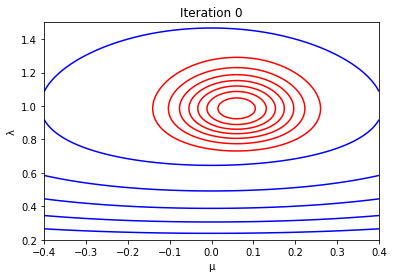

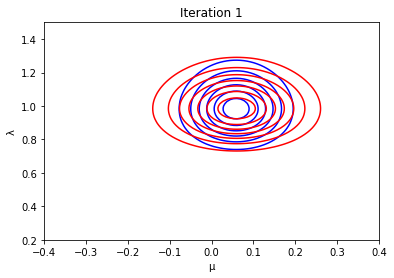

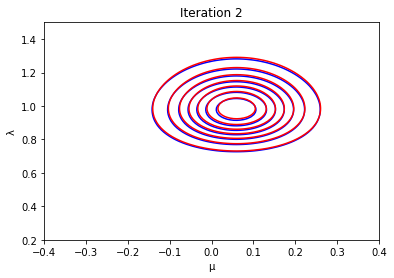

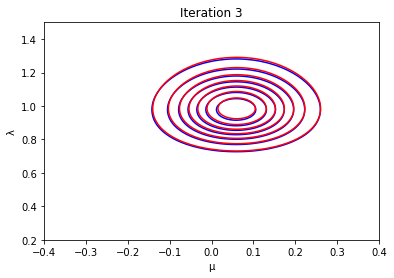

In [146]:
plots(mu_updated,lambda_updated**(-0.5),a_0,b_0,np.mean(Data),iter=0)

#Using Mean Field-VI assumption updating parameters of distribution of mu and lambda

for i in range(3):
  mu_updated = (lambda_0*mu_0 + N*np.mean(Data))/(lambda_0 + N)
  lambda_updated = (lambda_0+N)*tau_mean
  
  a_updated = a_0+((N+1)/2)

  b_updated = b_0 + lambda_0*((1/lambda_updated) + (mu_updated-mu_0)**2) +(1/2)*N*np.mean(Data**2 + (1/lambda_updated)+mu_updated**2) - mu_updated*np.mean(Data)
  tau_mean = a_updated/b_updated
  plots(mu_updated,lambda_updated**(-0.5),a_updated,b_updated,np.mean(Data),iter=i+1)